In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
np.set_printoptions(precision=4, linewidth=100)
mba_salary_df = pd.read_csv( 'Salary_monthly.csv' )
mba_salary_df.head( 7 )

,Experience,Salary
0,1.0,410
1,1.3,420
2,1.6,450
3,2.0,460
4,2.5,473
5,3.0,500
6,3.2,515


In [ ]:
mba_salary_df.info()

In [ ]:
import statsmodels.api as sm
X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
X.head(7)

In [4]:
Y = mba_salary_df['Salary']

In [15]:
Y.head(7)

0    270000
1    200000
2    240000
3    250000
4    180000
5    300000
6    260000
Name: Salary, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X ,
Y,
train_size = 0.8,
random_state = 100 )
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

In [6]:
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [7]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2022-03-11 21:56      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

<Figure size 576x432 with 0 Axes>

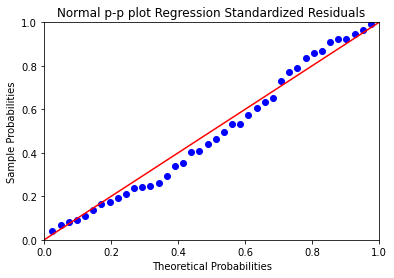

In [8]:
ppplot = sm.ProbPlot( mba_salary_lm.resid, fit=True );
plt.figure( figsize = (8, 6) );
ppplot.ppplot( line='45' );
plt.title("Normal p-p plot Regression Standardized Residuals");
plt.show()

In [9]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

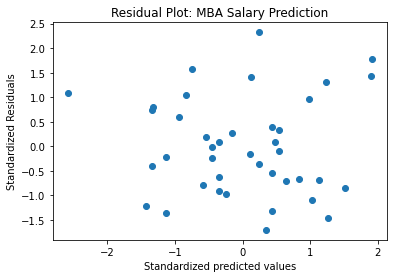

In [10]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ),
get_standardized_values( mba_salary_lm.resid ) )
plt.title( "Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [11]:
from scipy.stats import zscore
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


In [12]:
pred_y = mba_salary_lm.predict( test_X )

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_y, pred_y))

0.156645849742304

In [14]:
np.sqrt(mean_squared_error(pred_y, test_y))

73458.04348346895